In [49]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression, Lasso,LassoCV,Ridge,RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [25]:
data=pd.read_csv(r'https://raw.githubusercontent.com/training-ml/Files/0a8a712d6f96505a0960d0667cfb8cf445675fa2/Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [34]:
data.shape

(500, 8)

In [27]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [28]:
data['TOEFL Score'].unique()

array([118., 107., 104., 110., 103., 115., 109., 101., 102., 108., 106.,
       111., 112., 105., 114., 116., 119., 120.,  98.,  93.,  99.,  97.,
       117., 113., 100.,  nan,  95.,  96.,  94.,  92.])

In [29]:
data['GRE Score']=data['GRE Score'].fillna(data['GRE Score'].mode()[0])
data['TOEFL Score']=data['TOEFL Score'].fillna(data['TOEFL Score'].mode()[0])
data['University Rating']=data['University Rating'].fillna(data['University Rating'].mode()[0])


In [30]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.422000,107.244000,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.131205,6.064158,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [31]:
data=data.drop(columns=['Serial No.'])


In [32]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,312.0,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


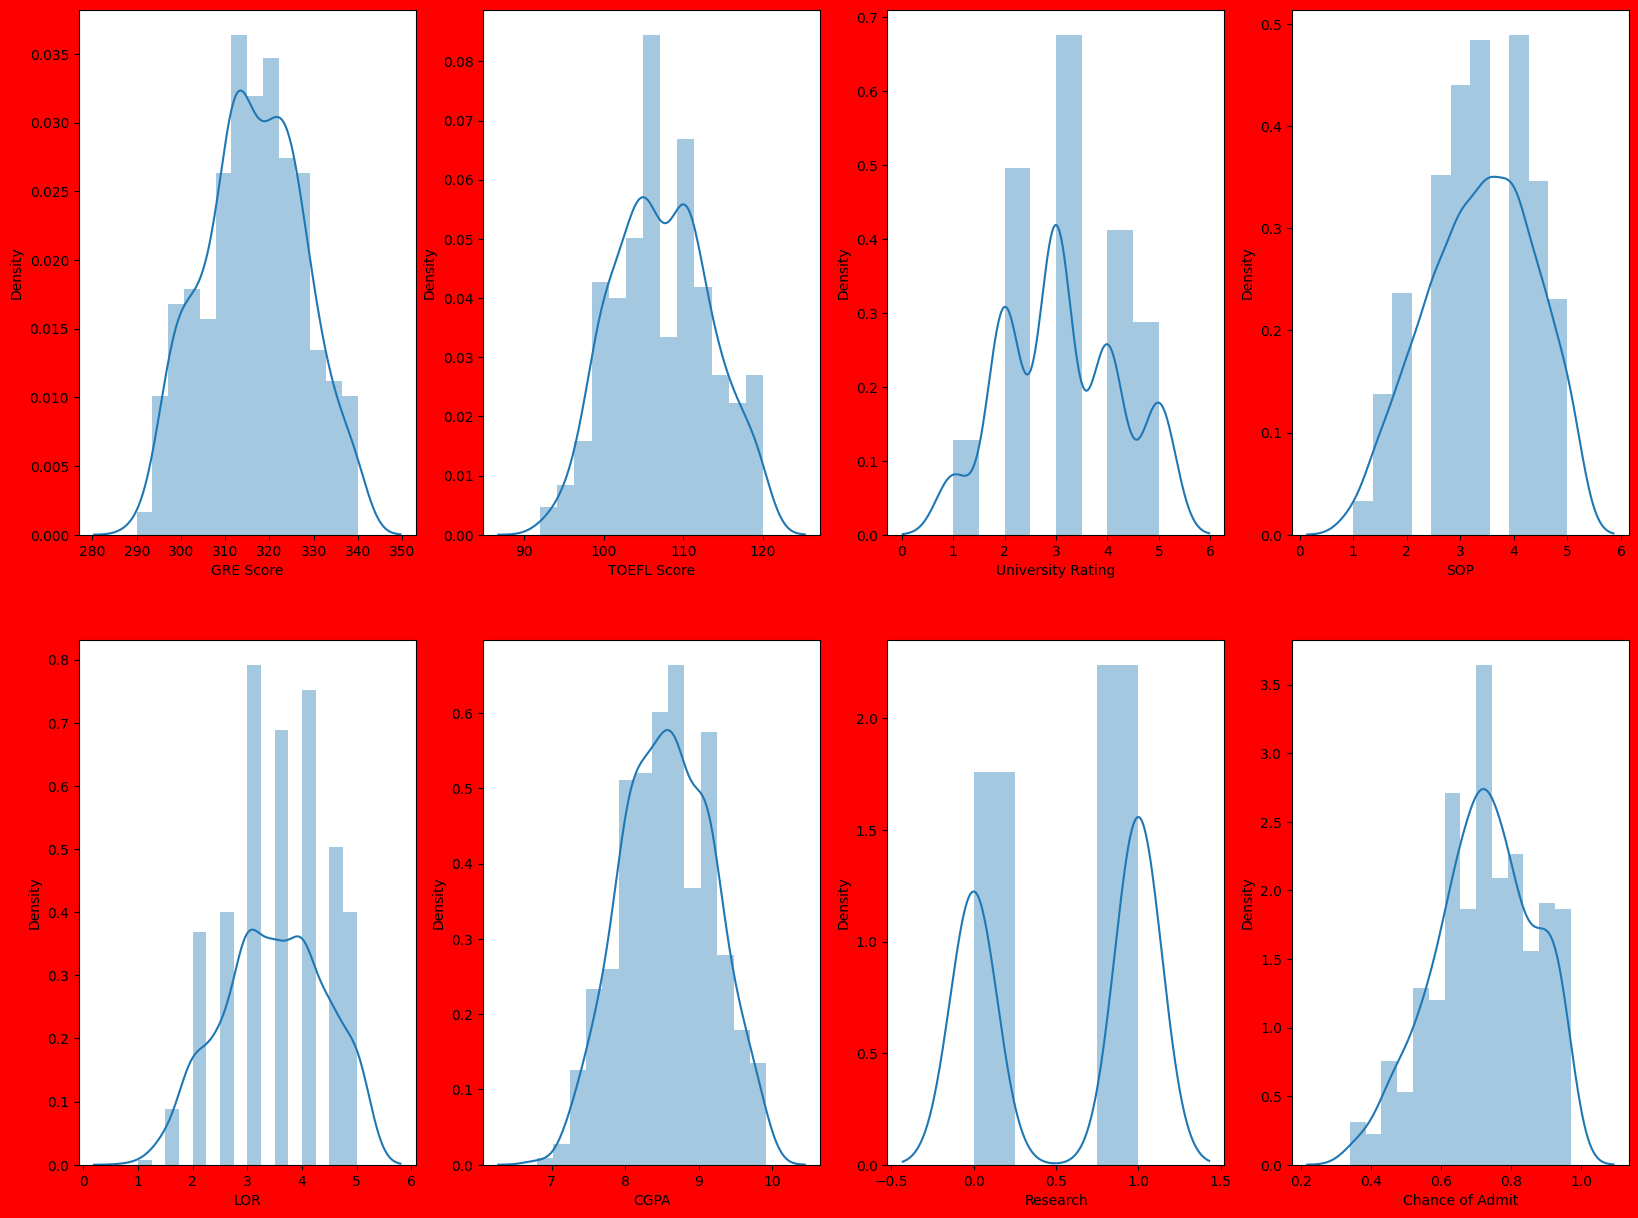

In [35]:
plt.figure(figsize=(20,15),facecolor='red')
plotnumber=1
for column in data.columns:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

In [37]:
x=data.drop(columns='Chance of Admit')
y=data['Chance of Admit']

In [38]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,312.0,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0


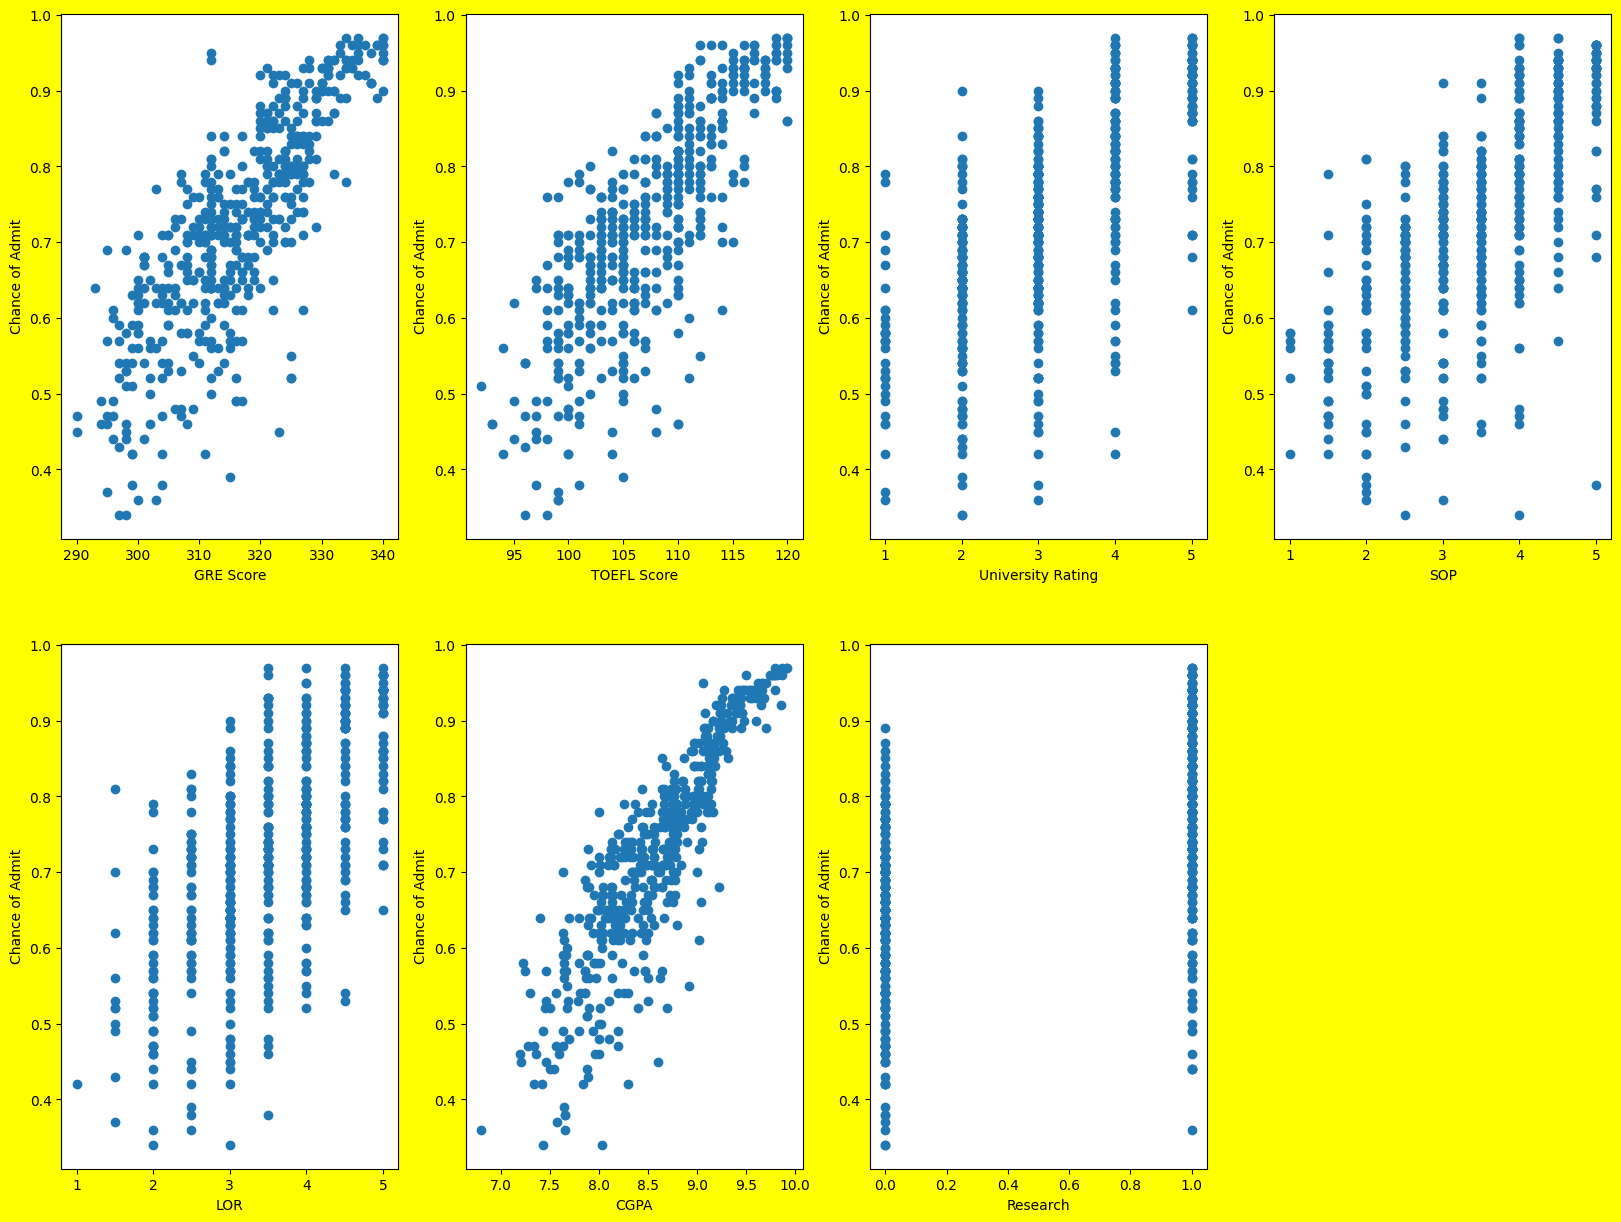

In [41]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<8:
        plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column)
        plt.ylabel('Chance of Admit')
    plotnumber+=1
plt.show()

In [42]:
scaler=StandardScaler()

In [43]:
x_scaled=scaler.fit_transform(x)

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=345)

In [45]:
linear_reg=LinearRegression()

In [46]:
linear_reg.fit(x_train,y_train)

LinearRegression()

In [47]:
linear_reg.score(x_test,y_test)

0.7493533392811653

In [50]:
y_pred=linear_reg.predict(x_test)

In [51]:
mean_squared_error(y_pred,y_test)

0.004452453594098178

In [52]:
mean_absolute_error(y_pred,y_test)

0.04664082329738122

In [53]:
rmse=np.sqrt(mean_squared_error(y_pred,y_test))

In [54]:
rmse

0.06672670825163023

In [58]:
lasso=LassoCV(alphas=None,max_iter=20)
lasso.fit(x_train,y_train)

LassoCV(max_iter=20)

In [60]:
alpha=lasso.alpha_
alpha

0.00012824988109170682

In [61]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.00012824988109170682)

In [62]:
lasso_reg.score(x_test,y_test)

0.7496233365882863

In [64]:
ridge=RidgeCV(alphas=np.arange(0.001,0.1,0.01))
ridge.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [65]:
alpha=ridge.alpha_

In [66]:
alpha

0.09099999999999998

In [70]:
ridge_reg=Ridge(alpha)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [71]:
ridge_reg.score(x_test,y_test)

0.7493569783847869